In [152]:
import pandas as pd 
import numpy as np 

In [154]:
df=pd.read_csv(r"C:\Users\visha\OneDrive\Churn_Modelling.csv")

In [156]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [158]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

In [160]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [162]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [164]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [200]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [202]:
ct = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(drop='first'), ['Geography','Gender'])
    ],remainder='passthrough'
)

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [171]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [192]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [194]:
from sklearn.model_selection import train_test_split

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [204]:
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()
x_train_scaled=sclaer.fit_transform(x_train)
x_test_scaled=sclaer.transform(x_test)

In [188]:
x_train_scaled

array([[ 1.71490137, -0.57273139,  0.91509065, ..., -1.55337352,
         0.97725852,  0.42739449],
       [-0.58312392, -0.57273139, -1.09278791, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [ 1.71490137, -0.57273139, -1.09278791, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [-0.58312392, -0.57273139, -1.09278791, ...,  0.64376017,
         0.97725852, -0.14096853],
       [-0.58312392, -0.57273139, -1.09278791, ...,  0.64376017,
         0.97725852,  0.01781218],
       [ 1.71490137, -0.57273139,  0.91509065, ...,  0.64376017,
        -1.02327069, -1.15822478]])

In [210]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [242]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\visha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [244]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [267]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [284]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8722 - loss: 0.3200 - val_accuracy: 0.8506 - val_loss: 0.3501
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3184 - val_accuracy: 0.8494 - val_loss: 0.3498
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3343 - val_accuracy: 0.8506 - val_loss: 0.3500
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3063 - val_accuracy: 0.8519 - val_loss: 0.3491
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.3103 - val_accuracy: 0.8506 - val_loss: 0.3476
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8669 - loss: 0.3241 - val_accuracy: 0.8525 - val_loss: 0.3494
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.3077 - val_accuracy: 0.8512 - val_loss: 0.3491
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3211 - val_accu

In [286]:
model.layers[0].get_weights()

[array([[-4.42500383e-01, -2.15093419e-01,  9.25864398e-01,
          5.74715361e-02,  1.88582748e-01, -4.74945515e-01,
          3.20866376e-01,  2.73423284e-01,  3.36090535e-01,
          6.85874999e-01,  6.69146657e-01],
        [-5.02815619e-02,  1.71954427e-02,  1.84813008e-01,
         -2.99437404e-01,  1.75063252e-01, -6.19830005e-02,
         -1.13833606e-01, -1.53481111e-01,  1.41928852e-01,
         -6.34999480e-03,  4.62136082e-02],
        [ 8.71931240e-02, -6.75792843e-02,  3.73139262e-01,
          1.56763256e-01,  1.32358940e-02,  5.91665566e-01,
         -9.82465744e-02, -2.98730731e-01,  4.14002568e-01,
         -1.71453491e-01, -8.45612735e-02],
        [-2.94435799e-01, -1.46391794e-01,  6.06095016e-01,
         -1.76141977e-01,  8.96998122e-02, -1.46346405e-01,
         -4.99918163e-02, -6.59399107e-02, -1.60940103e-02,
         -3.93742695e-02, -1.19184226e-01],
        [-1.14335082e-01, -5.58145158e-02, -4.06150609e-01,
          1.68255046e-01, -8.73860240e-01, -

In [287]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [288]:
y_pred=np.where(y_log>0.5,1,0)

In [289]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [290]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.859

In [297]:
history.history

{'accuracy': [0.8714062571525574,
  0.8715624809265137,
  0.8737499713897705,
  0.8725000023841858,
  0.8737499713897705,
  0.8717187643051147,
  0.8734375238418579,
  0.8715624809265137,
  0.8714062571525574,
  0.8743749856948853,
  0.8717187643051147,
  0.871874988079071,
  0.8706250190734863,
  0.8729687333106995,
  0.8728125095367432,
  0.871874988079071,
  0.8714062571525574,
  0.8709375262260437,
  0.8715624809265137,
  0.8715624809265137,
  0.8734375238418579,
  0.8735937476158142,
  0.8740624785423279,
  0.8720312714576721,
  0.8712499737739563,
  0.8720312714576721,
  0.8735937476158142,
  0.8729687333106995,
  0.8726562261581421,
  0.871874988079071,
  0.8739062547683716,
  0.8714062571525574,
  0.8732812404632568,
  0.874218761920929,
  0.8739062547683716,
  0.8735937476158142,
  0.8729687333106995,
  0.8734375238418579,
  0.8729687333106995,
  0.8729687333106995,
  0.8743749856948853,
  0.8726562261581421,
  0.8728125095367432,
  0.8739062547683716,
  0.874218761920929,
  0

In [299]:
import matplotlib.pyplot as plt

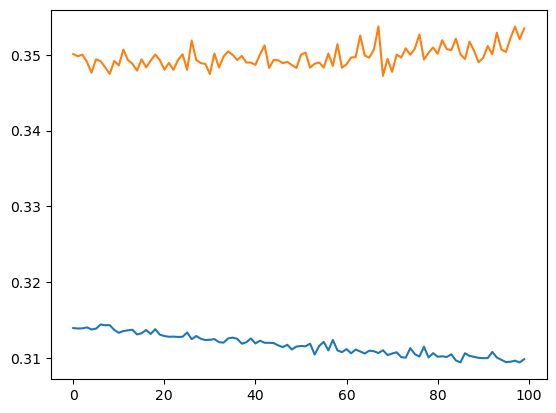

In [305]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])